In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def plot_band(ax, x, y, band_scale=0, label=None, color=None):
    """Plot mean and min-to-max color band for stacked data y.

    Parameters
    ----------
    ax : plt.axes.Axes
        Target plot.
    x : np.array
        x data array, with shape (time).
    y : np.array
        y data array, with shape (trajectory idx, time).

    Keyword Args
    ------------
    band_scale : float
        Lower and upper band variance multiplier. If 0, uses min/max instead.
    label : str
        Line label for legend.
    color : str
        Line/shading color.
    """

    mean = np.mean(y, axis=0)

    if band_scale == 0:
        lower = np.min(y, axis=0)
        upper = np.max(y, axis=0)
    else:
        stddev = np.sqrt(np.var(y, axis=0))
        mean = np.mean(y, axis=0)
        lower = mean - band_scale * stddev
        upper = mean + band_scale * stddev

    mean_line, = ax.plot(x, mean, label=label, color=color)
    ax.fill_between(x, lower, upper, alpha=0.25, color=mean_line.get_color())
    return mean_line
    

In [49]:
experiments = {
    # 'mf1': np.load("mf.npz"),
    'mfa': np.load("mfa.npz"),
    'mfnn': np.load("mfnn.npz"),
    'mfnn_opcodes': np.load("mfnn_opcodes.npz"),
    'mfnn_pca': np.load("mfnn_pca.npz"),
    "mfnn_both": np.load("mfnn_both.npz")
}
sparsity = [0.95, 0.9, 0.75, 0.5, 0.25, 0.1, 0.05]

(0.0, 1.0)

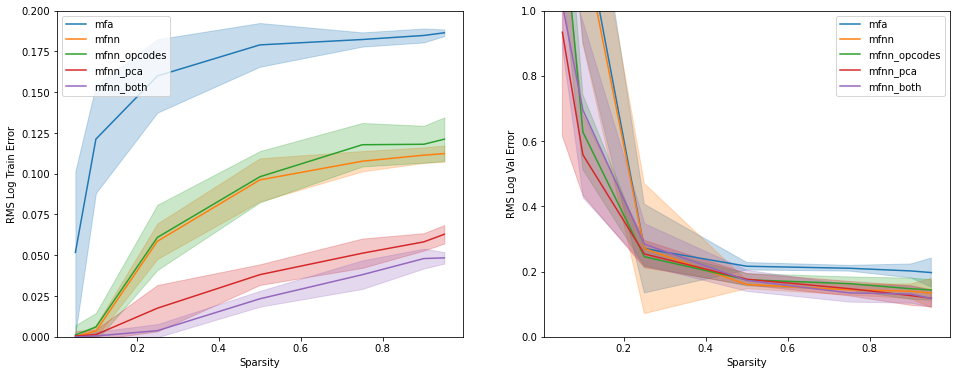

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

for i, (k, v) in enumerate(experiments.items()):
    plot_band(
        axs[0], sparsity, np.min(np.sqrt(v['train']), axis=2).T,
        label=k, color='C{}'.format(i), band_scale=2)
    plot_band(
        axs[1], sparsity, np.min(np.sqrt(v['val']), axis=2).T,
        label=k, color='C{}'.format(i), band_scale=2)
    axs[0].legend()
    axs[1].legend()

axs[0].set_xlabel("Sparsity")
axs[1].set_xlabel("Sparsity")
axs[0].set_ylabel("RMS Log Train Error")
axs[1].set_ylabel("RMS Log Val Error")

axs[0].set_ylim(0, 0.2)
# axs[1].set_ylim(0, 1.0)

(0.0, 2.0)

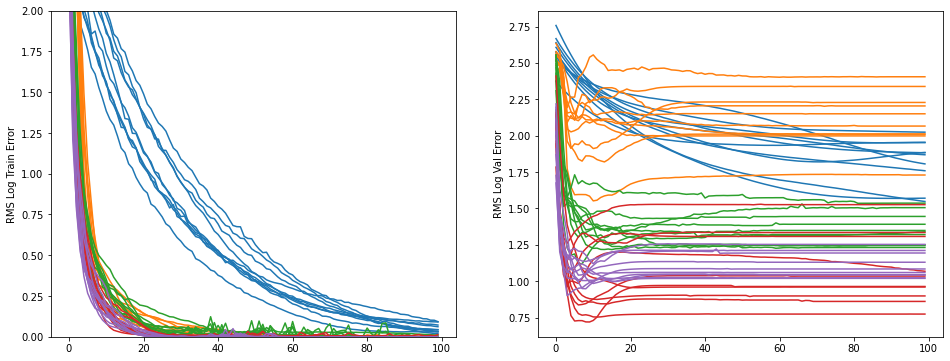

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

for i, (k, v) in enumerate(experiments.items()):
    axs[0].plot(np.sqrt(v['train'][-1]).T, color='C{}'.format(i))
    axs[1].plot(np.sqrt(v['val'][-1]).T, color='C{}'.format(i))

axs[0].set_ylabel("RMS Log Train Error")
axs[1].set_ylabel("RMS Log Val Error")

axs[0].set_ylim(0, 2.0)
# axs[1].set_ylim(0.1, 0.6)
